In [32]:
import ROOT
import os
%run ./toolkit/asym_tools_2d.ipynb
ROOT.gStyle.SetEndErrorSize(0)
c = ROOT.TCanvas("c","c",800,800)

---

**Default file prefix in volatile**

This should point to the directory where the *.root* files from SIDISKinematicReco's output are saved, and also the directory where organize_rgc.py splits the data set into separate subdirectories for target type and half-wave-plate status

In [33]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc/sidisdvcs/test8.3.2/"

In [34]:
_target = "NH3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_runMin = 17076             # Minimum run
_runMax = 17102              # Maximum run
_runList = []                # One can define runs by hand, but a conflict occurs if both a runMin/runMax is set
                            #  along with a runList

# xH will return a list containing an <<<element>>> for each run (since doRunCumulative=False)
# Each element contains 6 parameters
#     - Run #
#     - Target
#     - Target polarization (from RCDB)
#     - Half wave plate status (from RCDB)
#     - Asymmetry histogram ---> (N+  -  N-)/(N+  +  N-)
#     - Weighted Asymmetry histogram ---> (L-N+  -  L+N-)/(L-N+  + L+N-)
#          - This reweighting accounts for beamChargeAsymmetry (uneven # of +/- helicity events)
#     - Faraday cup accumulation for Hel=+1 in Recon
#     - Faraday cup accumulation for Hel=-1 in Recon

# Most arguments here are self explanatory, apart from...
#     - doRunOrdering -->   (T) Order the output (params) by run #
#                           (F) Do not order by run # (not sure why you'd prefer this though)

params = compute_asym(rootdir = file,
                  target  = _target,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True,
                  correction=True)

Completed NH3 run 17076
Completed NH3 run 17085
Completed NH3 run 17088
Completed NH3 run 17092
Completed NH3 run 17093
Completed NH3 run 17095
Completed NH3 run 17098
Completed NH3 run 17102
Done


In [35]:
df = unpack_to_dataframe(params,dilution="newnew")

[17076 17085 17088 17092 17093 17095 17098 17102]


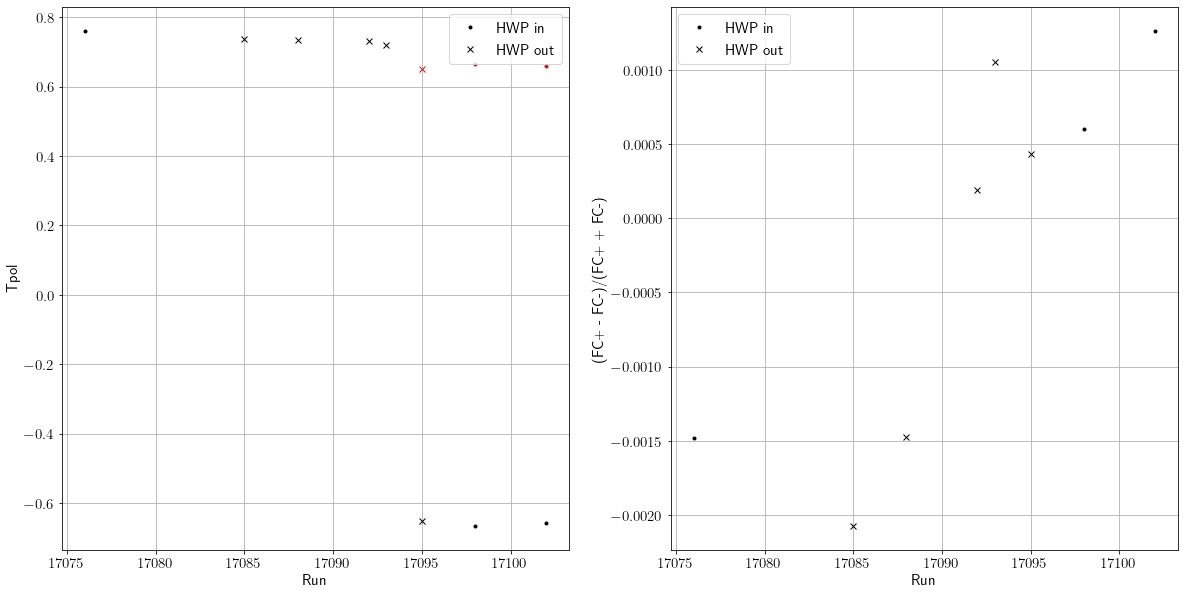

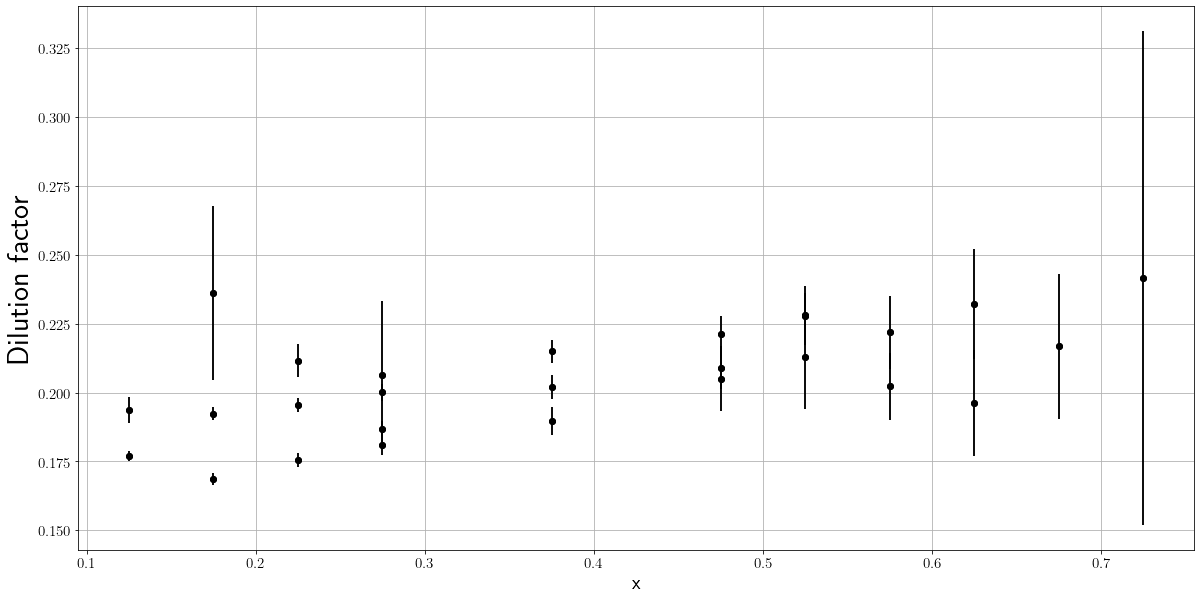

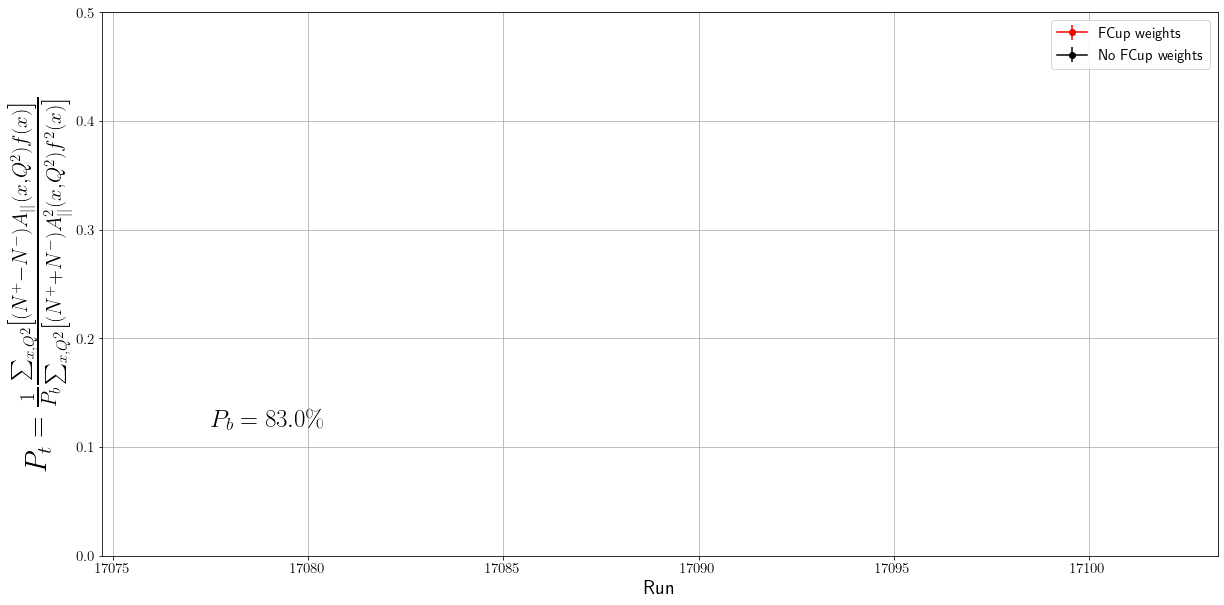

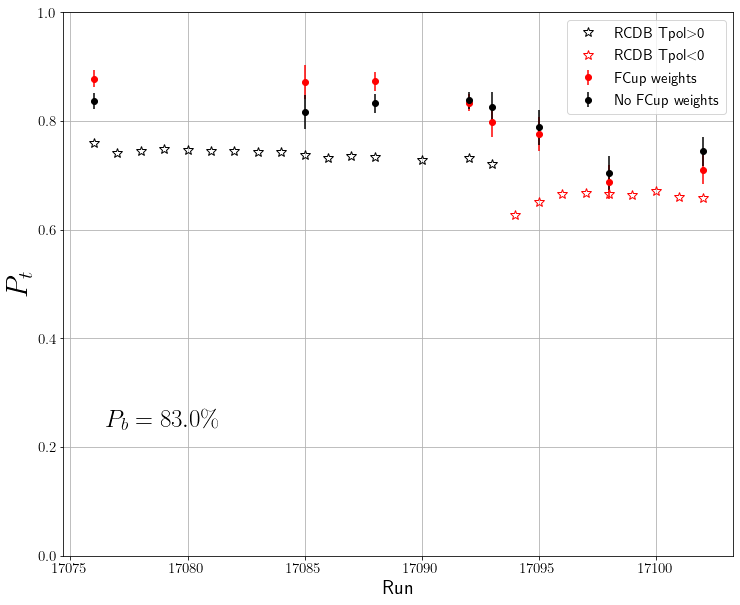

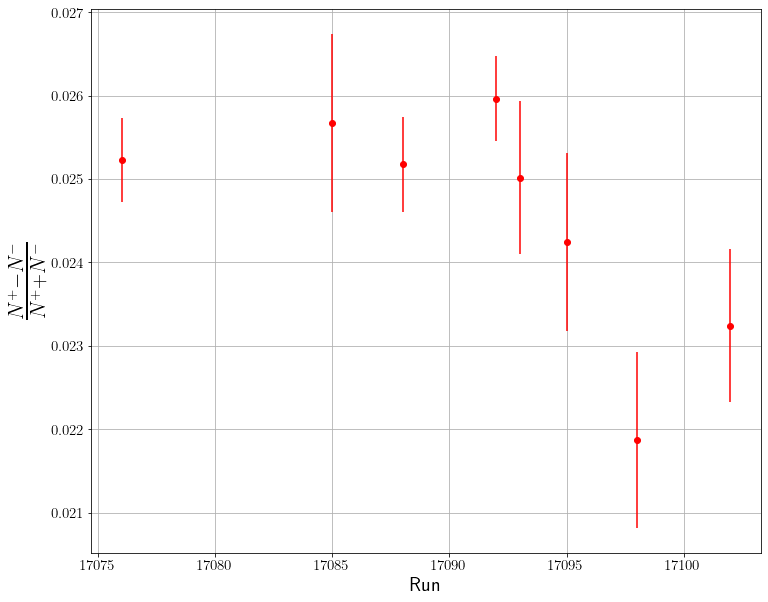

In [36]:
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol)

In [37]:
from scipy.optimize import curve_fit
x=np.unique(DF["Run"])
_,idxy=np.unique(DF["Pt"],return_index=True)
y=DF["Pt"][np.sort(idxy)].to_numpy()
yerr=DF["Pt_err"][np.sort(idxy)].to_numpy()
def f(x,a):
    return a
params,covars = curve_fit(f,x,y,sigma=yerr)
print(params,np.sqrt(covars[0][0]))

[0.82895686] 0.022679110896296505


In [34]:
DF.to_csv("/work/clas12/users/gmat/RGC_16889_16922_coatjava832.csv")

In [8]:
pd.set_option("max_columns",None)
display(DF[DF.Run==17265])

,Run,Target,Tpol RCDB,HWP,xmin,xmax,x,Q2min,Q2max,Q2,A_LL,A_LL_err,A_LL_wt,A_LL_wt_err,A_||,f,ferr,fcup_parallel,fcup_antiparallel,N+,N-,N+err,N-err,n+,n-,n+err,n-err,Pb,Pt,Pt_err
162,17265,ND3,-0.257376,in,0.10,0.15,0.125,1.0969,1.3094,1.20315,0.002114,0.012753,0.006647,0.012753,0.018,[0.3004839190411443],[0.0038521311537623],6067.864835,6123.128349,3081.0,3068.0,55.506756,55.389530,0.507757,0.501051,0.009148,0.009046,0.83,0.457274,0.054926
163,17265,ND3,-0.257376,out,0.10,0.15,0.125,1.3094,1.5632,1.43630,0.004585,0.005439,0.009118,0.005439,0.024,[0.2912347506417367],[0.0016371573137055],6067.864835,6123.128349,16979.0,16824.0,130.303492,129.707363,2.798184,2.747615,0.021474,0.021183,0.83,0.457274,0.054926
164,17265,ND3,-0.257376,out,0.10,0.15,0.125,1.5632,1.8661,1.71465,-0.000212,0.004600,0.004322,0.004600,0.032,[0.2865202254647905],[0.0014339356517436],6067.864835,6123.128349,23629.0,23639.0,153.717273,153.749797,3.894121,3.860608,0.025333,0.025110,0.83,0.457274,0.054926
165,17265,ND3,-0.257376,out,0.10,0.15,0.125,1.8661,2.2277,2.04690,-0.004694,0.006178,-0.000161,0.006178,0.040,[0.2792041466499874],[0.0020023179302951],6067.864835,6123.128349,13039.0,13162.0,114.188441,114.725760,2.148861,2.149555,0.018819,0.018736,0.83,0.457274,0.054926
166,17265,ND3,-0.257376,out,0.15,0.20,0.175,1.0969,1.3094,1.20315,0.040816,0.101099,0.045341,0.101120,0.027,[0.3337157698192837],[0.0257136234932175],6067.864835,6123.128349,51.0,47.0,7.141428,6.855655,0.008405,0.007676,0.001177,0.001120,0.83,0.457274,0.054926
167,17265,ND3,-0.257376,out,0.15,0.20,0.175,1.3094,1.5632,1.43630,-0.000159,0.008907,0.004374,0.008907,0.034,[0.3008421863815225],[0.0026168571148382],6067.864835,6123.128349,6302.0,6304.0,79.385137,79.397733,1.038586,1.029539,0.013083,0.012967,0.83,0.457274,0.054926
168,17265,ND3,-0.257376,out,0.15,0.20,0.175,1.5632,1.8661,1.71465,0.004569,0.005906,0.009102,0.005906,0.044,[0.2957735203344183],[0.0018025294378549],6067.864835,6123.128349,14402.0,14271.0,120.008333,119.461291,2.373487,2.330671,0.019778,0.019510,0.83,0.457274,0.054926
169,17265,ND3,-0.257376,out,0.15,0.20,0.175,1.8661,2.2277,2.04690,0.000435,0.004918,0.004969,0.004918,0.055,[0.2880816454232776],[0.0015744784587153],6067.864835,6123.128349,20680.0,20662.0,143.805424,143.742826,3.408118,3.374419,0.023700,0.023475,0.83,0.457274,0.054926
170,17265,ND3,-0.257376,out,0.15,0.20,0.175,2.2277,2.6594,2.44355,0.003061,0.005030,0.007594,0.005030,0.068,[0.2778574012958738],[0.0016826188628438],6067.864835,6123.128349,19826.0,19705.0,140.804829,140.374499,3.267377,3.218126,0.023205,0.022925,0.83,0.457274,0.054926
171,17265,ND3,-0.257376,out,0.15,0.20,0.175,2.6594,3.1747,2.91705,0.014691,0.009035,0.019223,0.009036,0.082,[0.2834021488082116],[0.0030286966513511],6067.864835,6123.128349,6216.0,6036.0,78.841613,77.691698,1.024413,0.985771,0.012993,0.012688,0.83,0.457274,0.054926


In [12]:
np.unique(DF[DF.Pt<0]["Tpol RCDB"])*100

array([-64.3556  , -63.7969  , -51.2551  , -51.2262  , -50.8841  ,
       -50.239   ,  -0.276352,   0.41807 ,   0.441638,  56.6081  ,
        57.527   ,  58.7043  ])

# Vz_e dependence
---


In [38]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc/sidisdvcs/test8.3.2/"

In [43]:
from scipy.optimize import curve_fit
def f(x,a):
    return a
_target = "NH3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
#_runMin = 17076              # Minimum run
#_runMax = 17102              # Maximum run
_runList=[17001,17015,17019]
#_runList=[16983,16990,16992]
vz_arr = np.linspace(-10,4,20)
Pt=[]
Pterr=[]
for i in range(len(vz_arr)-1):
    vzl=vz_arr[i]
    vzh=vz_arr[i+1]
    params = compute_asym(rootdir = file,
                      target  = _target,
                      #runMin = _runMin,
                      #runMax = _runMax,
                      runList = _runList, 
                      doRunOrdering=True,
                      correction=True,
                      cut="vz_e>{} && vz_e<{} && p_e > 2.6 && th_e > 0.14 && th_e < 0.611".format(vzl,vzh))
    df = unpack_to_dataframe(params,dilution="newnew")
    beamPol = 0.83   # Polarization of beam
    DF = quick_Pt(df,beamPol,)
    x=np.unique(DF["Run"])
    _,idxy=np.unique(DF["Pt"],return_index=True)
    y=DF["Pt"][np.sort(idxy)].to_numpy()
    yerr=DF["Pt_err"][np.sort(idxy)].to_numpy()
    params,covars = curve_fit(f,x,y,sigma=yerr)
    Pt.append(params[0])
    Pterr.append(np.sqrt(covars[0][0]))

Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Completed NH3 run 17015
Completed NH3 run 17019
Done
[17001 17015 17019]
Completed NH3 run 17001
Comple

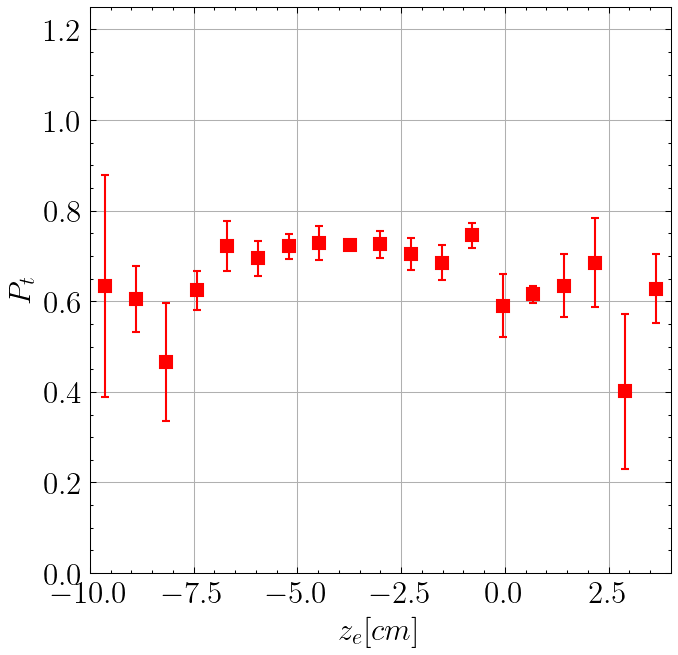

In [44]:
plt.style.use("science")
fig,axs=plt.subplots(1,1,figsize=(5,5),dpi=150)
axs.set_xlabel("$z_{e} [cm]$")
axs.set_ylabel("$P_{t}$")
x=0.5*(vz_arr[:-1]+vz_arr[1:])
axs.errorbar(x,Pt,yerr=Pterr,fmt="rs",capsize=2)
axs.set_xlim(-10,4)
axs.set_ylim(0,1.25)
axs.grid()

7

In [97]:
Pt

[0.7592033034463743,
 0.7770033124628343,
 0.8496189143934714,
 0.8472685525495445,
 0.8610641073004442,
 0.8290366323182843,
 0.8060664336647547]

---
# Deuteron Analysis

In [45]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/sept13/"

In [46]:
_target = "ND3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_runMin = 16700              # Minimum run
_runMax = 17000              # Maximum run
_runList = []                # One can define runs by hand, but a conflict occurs if both a runMin/runMax is set
                            #  along with a runList

# xH will return a list containing an <<<element>>> for each run (since doRunCumulative=False)
# Each element contains 6 parameters
#     - Run #
#     - Target
#     - Target polarization (from RCDB)
#     - Half wave plate status (from RCDB)
#     - Asymmetry histogram ---> (N+  -  N-)/(N+  +  N-)
#     - Weighted Asymmetry histogram ---> (L-N+  -  L+N-)/(L-N+  + L+N-)
#          - This reweighting accounts for beamChargeAsymmetry (uneven # of +/- helicity events)
#     - Faraday cup accumulation for Hel=+1 in Recon
#     - Faraday cup accumulation for Hel=-1 in Recon

# Most arguments here are self explanatory, apart from...
#     - doRunOrdering -->   (T) Order the output (params) by run #
#                           (F) Do not order by run # (not sure why you'd prefer this though)

params = compute_asym(rootdir = file,
                  target  = _target,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True)

Completed run 16889
Completed run 16902
Completed run 16903
Completed run 16904
Completed run 16905
Completed run 16910
Completed run 16918
Completed run 16923
Completed run 16924
Completed run 16925
Completed run 16927
Completed run 16928
Completed run 16931
Completed run 16933
Completed run 16935
Completed run 16944
Completed run 16945
Completed run 16947
Completed run 16951
Completed run 16959
Completed run 16963
Completed run 16965
Completed run 16968
Done


In [47]:
df = unpack_to_dataframe(params)

[16889 16902 16903 16904 16905 16910 16918 16923 16924 16925 16927 16928
 16931 16933 16935 16944 16945 16947 16951 16959 16963 16965 16968]


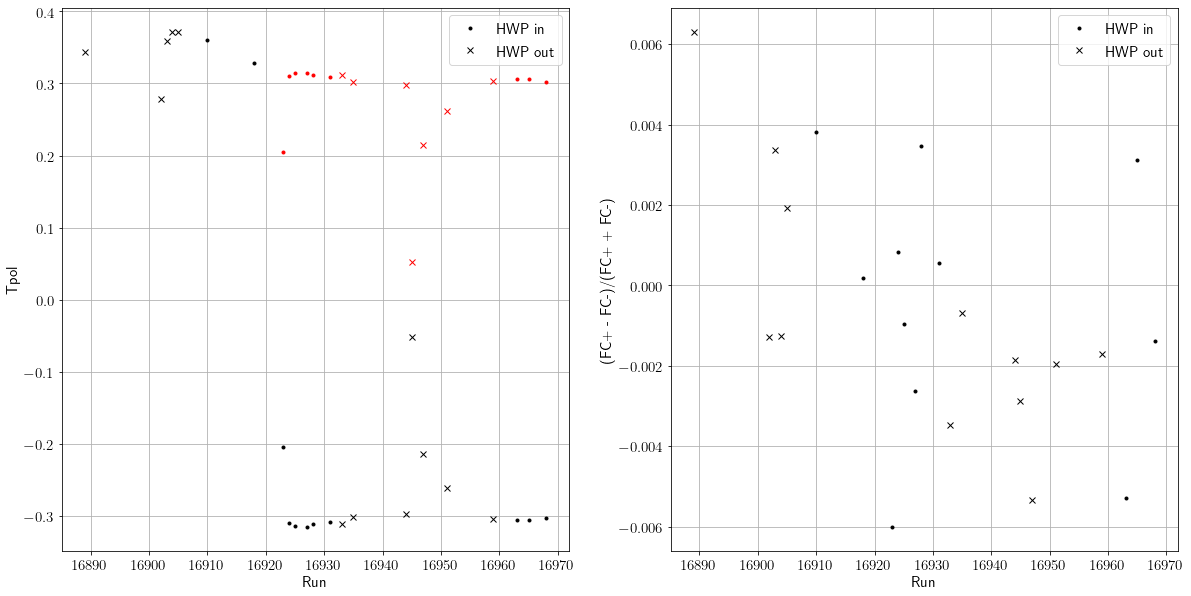

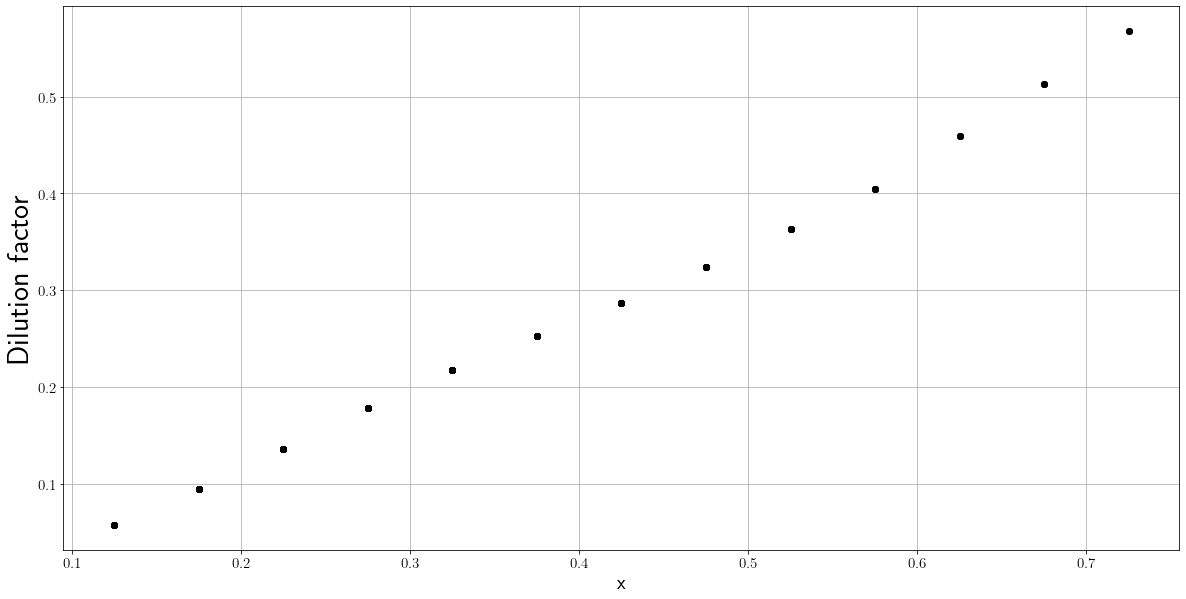

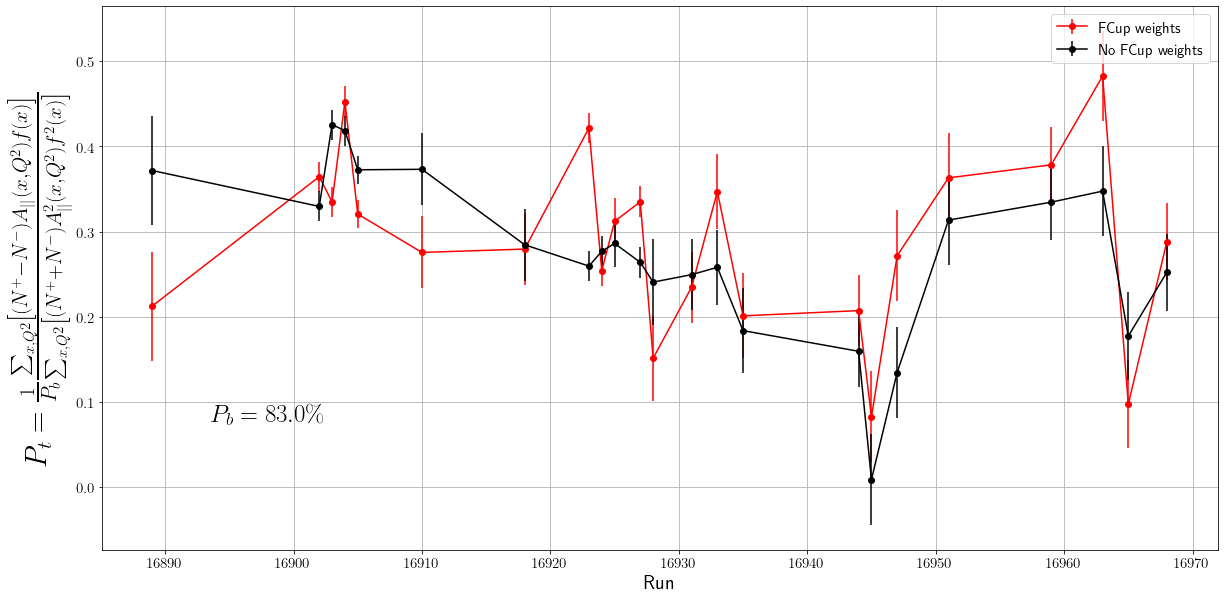

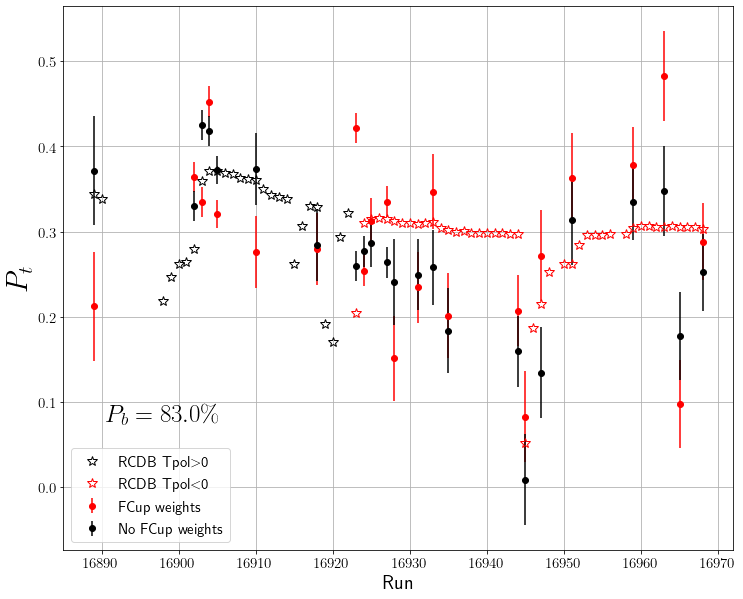

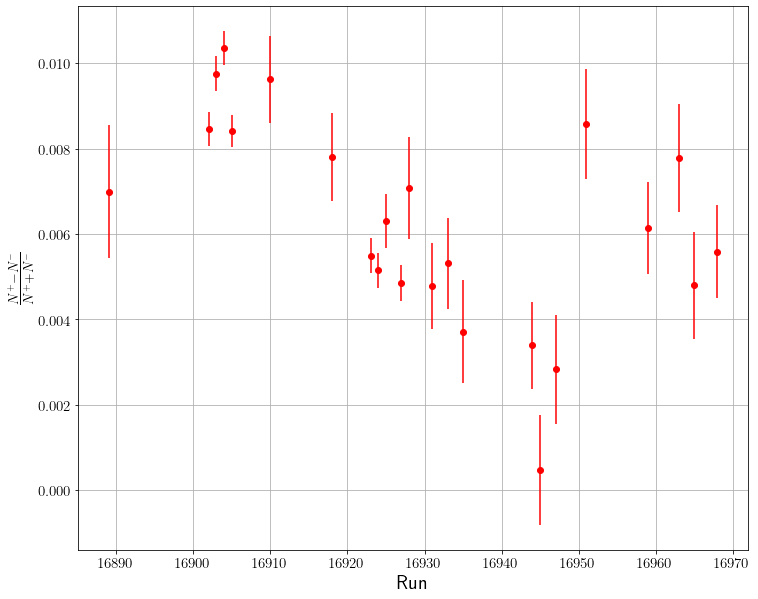

In [48]:
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol)

In [11]:
DF.to_csv("/work/clas12/users/gmat/RGC_16889_16968_sebastian.csv")

In [10]:
display(DF)

,Run,Target,Tpol RCDB,HWP,xmin,xmax,x,Q2min,Q2max,Q2,...,N-,N+err,N-err,n+,n-,n+err,n-err,Pb,Pt,Pt_err
0,16889,ND3,0.344011,out,0.10,0.15,0.125,0.9188,1.0969,1.00785,...,10.0,3.316625,3.162278,0.008920,0.008212,0.002689,0.002597,0.83,0.371660,0.063971
1,16889,ND3,0.344011,out,0.10,0.15,0.125,1.0969,1.3094,1.20315,...,2197.0,48.218254,46.872167,1.885354,1.804132,0.039100,0.038490,0.83,0.371660,0.063971
2,16889,ND3,0.344011,out,0.10,0.15,0.125,1.3094,1.5632,1.43630,...,11490.0,106.939235,107.191418,9.273510,9.435357,0.086718,0.088023,0.83,0.371660,0.063971
3,16889,ND3,0.344011,out,0.10,0.15,0.125,1.5632,1.8661,1.71465,...,15850.0,124.843903,125.896783,12.638766,13.015701,0.101237,0.103384,0.83,0.371660,0.063971
4,16889,ND3,0.344011,out,0.10,0.15,0.125,1.8661,2.2277,2.04690,...,8693.0,93.273791,93.236259,7.054874,7.138517,0.075636,0.076564,0.83,0.371660,0.063971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,16968,ND3,-0.302615,out,0.65,0.70,0.675,6.4475,7.6969,7.07220,...,79.0,8.831761,8.888194,0.031013,0.031324,0.003512,0.003524,0.83,0.252278,0.045316
1675,16968,ND3,-0.302615,out,0.65,0.70,0.675,7.6969,9.1884,8.44265,...,153.0,12.688578,12.369317,0.064014,0.060665,0.005045,0.004904,0.83,0.252278,0.045316
1676,16968,ND3,-0.302615,out,0.65,0.70,0.675,9.1884,10.9689,10.07865,...,84.0,9.380832,9.165151,0.034989,0.033306,0.003730,0.003634,0.83,0.252278,0.045316
1677,16968,ND3,-0.302615,out,0.70,0.75,0.725,7.6969,9.1884,8.44265,...,9.0,3.605551,3.000000,0.005169,0.003569,0.001434,0.001190,0.83,0.252278,0.045316


# Deuteron Analysis
---
Here, we implement a hack job to correct the apparent shunting of the FCupgated in HEL::scaler. Since the scaler bank analysis for details

In [16]:
file = "/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc-su-train/sept13/"

In [ ]:
_target = "ND3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_runMin = 16700              # Minimum run
_runMax = 17000              # Maximum run
_runList = []                # One can define runs by hand, but a conflict occurs if both a runMin/runMax is set
                            #  along with a runList

# xH will return a list containing an <<<element>>> for each run (since doRunCumulative=False)
# Each element contains 6 parameters
#     - Run #
#     - Target
#     - Target polarization (from RCDB)
#     - Half wave plate status (from RCDB)
#     - Asymmetry histogram ---> (N+  -  N-)/(N+  +  N-)
#     - Weighted Asymmetry histogram ---> (L-N+  -  L+N-)/(L-N+  + L+N-)
#          - This reweighting accounts for beamChargeAsymmetry (uneven # of +/- helicity events)
#     - Faraday cup accumulation for Hel=+1 in Recon
#     - Faraday cup accumulation for Hel=-1 in Recon

# Most arguments here are self explanatory, apart from...
#     - doRunOrdering -->   (T) Order the output (params) by run #
#                           (F) Do not order by run # (not sure why you'd prefer this though)

params = compute_asym(rootdir = file,
                  target  = _target,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True)

In [19]:
df = unpack_to_dataframe(params,hackJob=True)

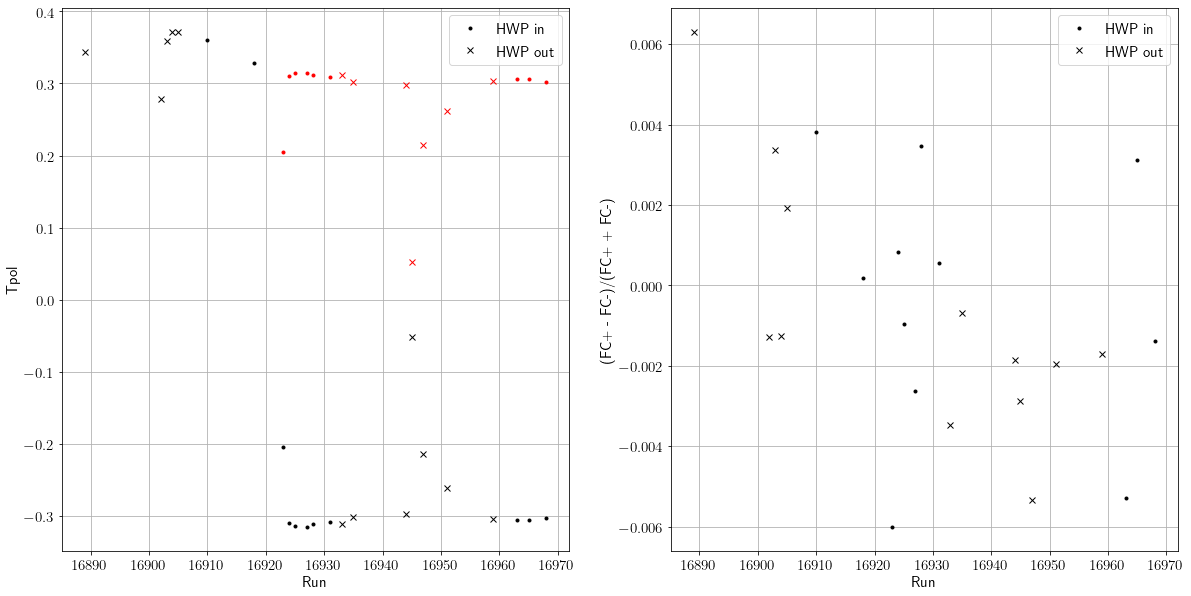

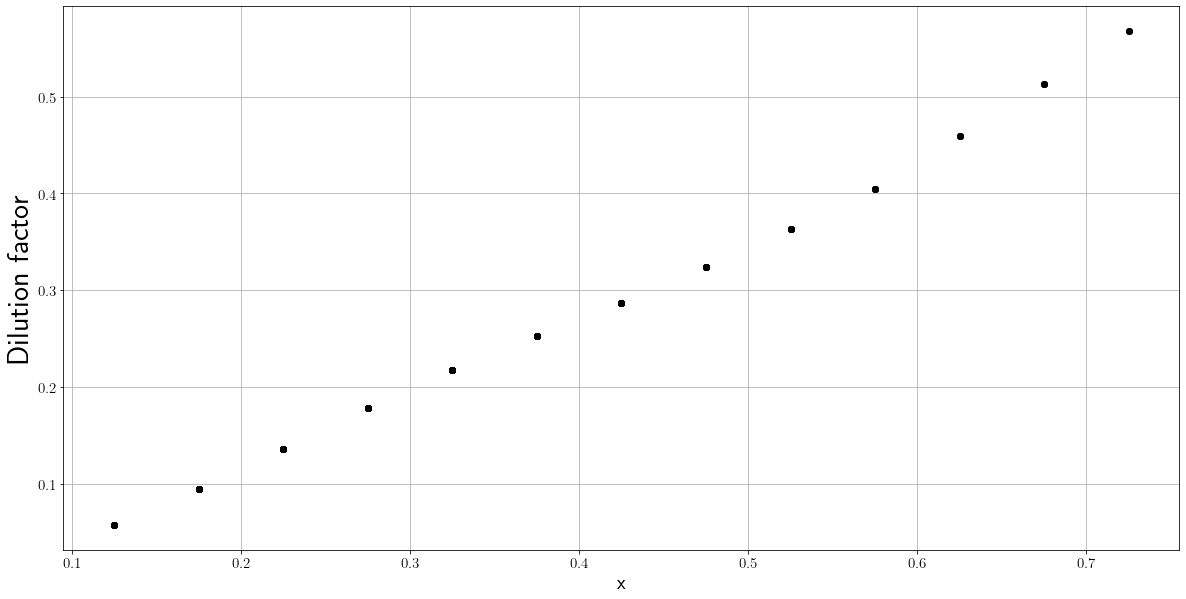

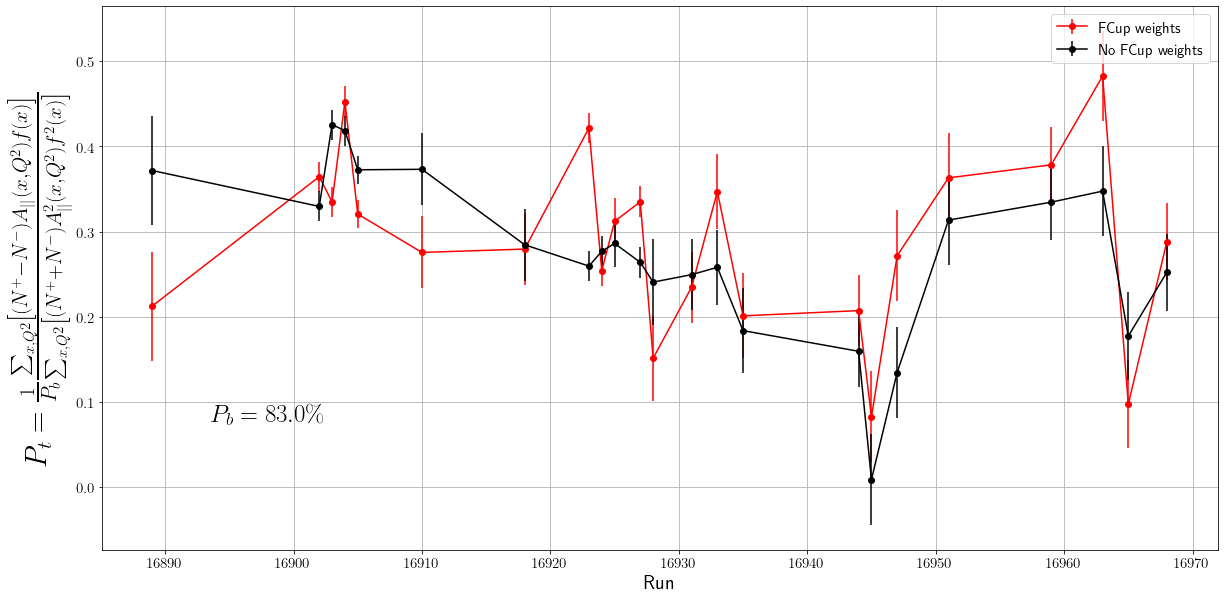

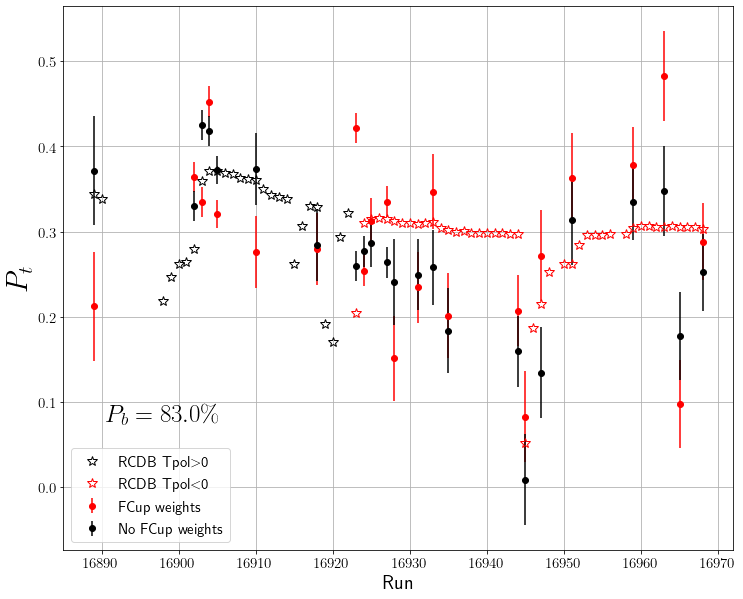

In [20]:
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol)

# Noemie Cross Check
---

In [66]:
%run ./toolkit/asym_tools_2d.ipynb
_target = "NH3"              # Target for analysis
                            # 'NH3', 'ND3', 'C', or '' for any target
_runMin = 16659        
_runMax = 16692              
_runList = []                


params = compute_asym(rootdir = file,
                  target  = _target,
                  runMin = _runMin,
                  runMax = _runMax,
                  runList = _runList, 
                  doRunOrdering=True,
                  correction=True)

Completed run 16659
Completed run 16665
Completed run 16671
Completed run 16674
Completed run 16676
Completed run 16679
Completed run 16682
Completed run 16685
Completed run 16688
Completed run 16692
Done


In [67]:
df = unpack_to_dataframe(params)

[16659 16665 16671 16674 16676 16679 16682 16685 16688 16692]


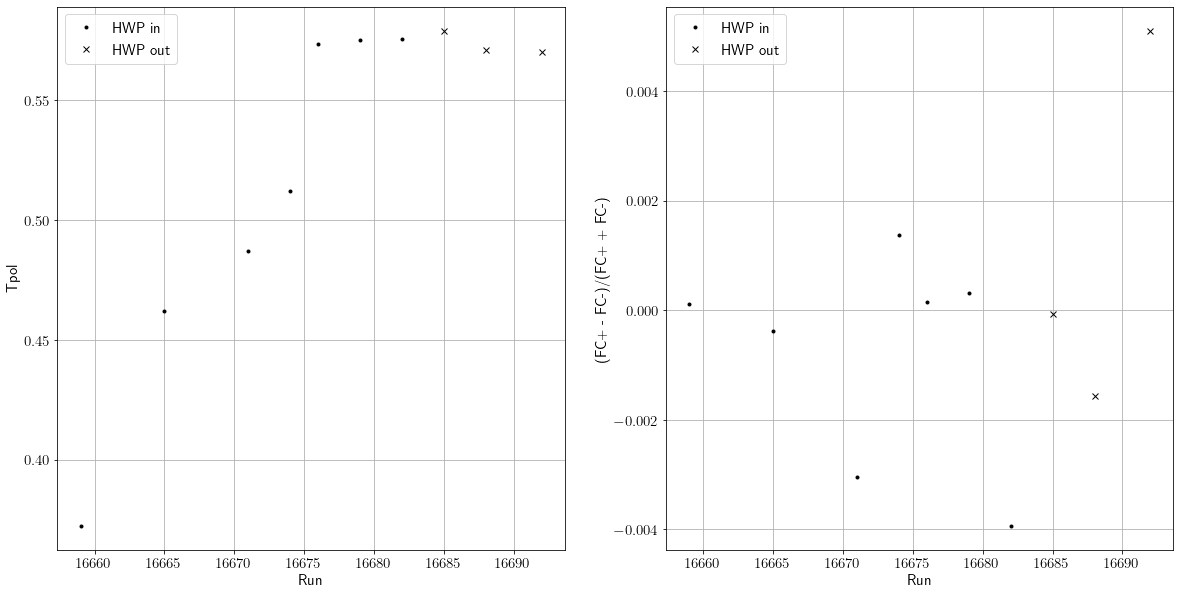

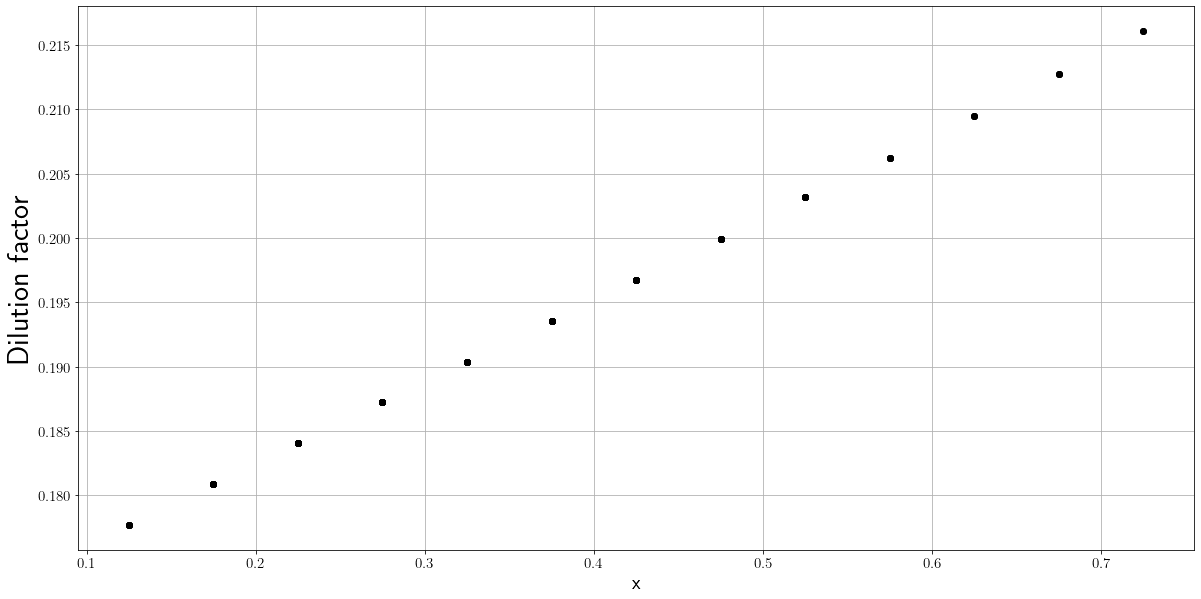

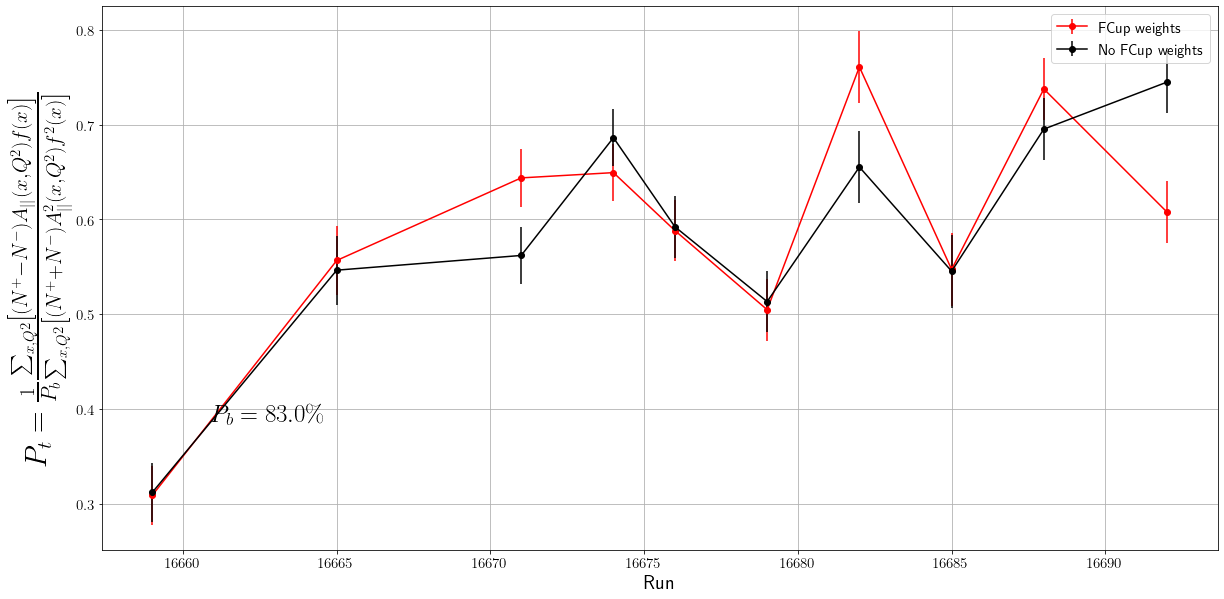

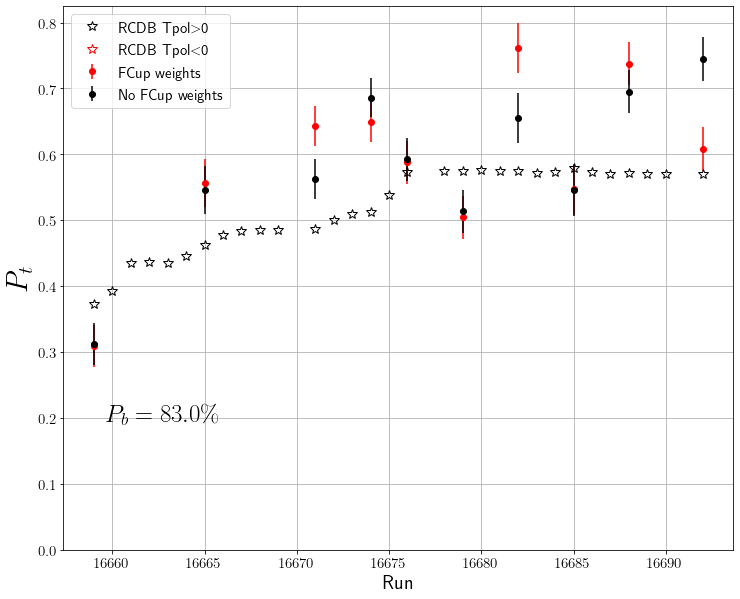

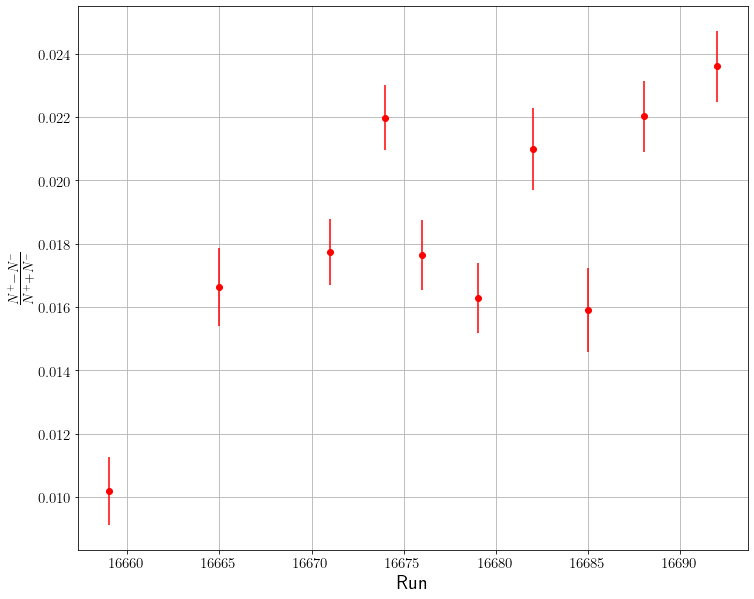

In [68]:
beamPol = 0.83   # Polarization of beam
DF = multigraph(df,beamPol)